## Варианты

Группа делится на 4 варианта.

Исходные данные:
* $m = 200$;
* $n = 200$;
* $T = 0.8 \cdot m \cdot n$;
* $F = 1$;
* $p_f = 2 \cdot 10^{-5}$;
* $p_g = 0.02$;
* "затравка" генератора чисел `seed = 1013`;
* число итераций по времени `time_iters = 500`.

Изменения в исходных данных в зависимости от варианта:
* Вариант 1: $p_f = (2, 3, 4) \cdot 10^{-5}$ (три различных значения параметра).
* Вариант 2: $p_g = (8, 16, 32) \cdot 10^{-3}$.
* Вариант 3: $T = (1/3, 2/3, 1) \cdot m \cdot n$.
* Вариант 4: $F = (1, 3, 9)$.

## Ход работы
---

### Подключение необходимых библиотек

In [2]:
%matplotlib inline
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
import numpy as np
from foresrfire import ForestFire

In [3]:
colors = ["#49423D", "green", "orange"]
cmap = ListedColormap(colors)

### Моделирование

In [4]:
m, n = 200, 200  # Размеры клеточного поля (длина и ширина соответственно)
T = int(0.8 * m * n)  # Доля клеток с деревьями от общего их количества
F = 1            # Число изначально горящих деревьев от общего количества клеток с деревьями
p_g = 0.02      # Вероятность вырастания нового дерева
p_f = 2e-5       # Вероятность случайного воспламенения дерева (молния)
time = 500      # Модельное время (число обновлений автомата)

Собственно, моделируем:

In [5]:
model_plus = ForestFire((m,n), T, F)
model_plus.set_neighborhood_rule(ForestFire.neighborhood_plus)

In [ ]:
model_round = ForestFire((m,n), T, F)
model_round.set_neighborhood_rule(ForestFire.neighborhood_round)

In [6]:
%%time
model_plus.simulate(p_g, p_f, time)

CPU times: total: 1.41 s
Wall time: 1.46 s


In [ ]:
%%time
model_round.simulate(p_g, p_f, time)

### Обработка и визуализация результатов

In [ ]:
model = model_round
frames = model.frames
#type_neigh = "Neumann_neighborhood"
type_neigh = "Moore_neighborhood"

In [ ]:
file_name = f'{type_neigh}_{p_f}.jpg'
file_name

In [ ]:
%matplotlib inline 
%config InlineBackend.figure_format = 'svg' 
rc = {"font.family" : "serif", 
      "mathtext.fontset" : "stix"}
plt.rcParams.update(rc)
plt.rcParams["font.serif"] = ["Times New Roman"] + plt.rcParams["font.serif"]
fs = 14
fig, ax = plt.subplots(figsize=(8, 8), nrows=2, ncols=2, tight_layout=True, dpi=300);

for i in range(2):
    for j in range(2):
        ax[i, j].pcolor(frames[(2*i+j)*50], cmap=cmap)
        ax[i, j].set_title(f'Step {(2*i+j)*50}', fontsize=fs+2, pad=10)
        ax[i, j].set_xlabel(r'$n$ cells',  fontsize = fs)
        ax[i, j].set_ylabel(r'$m$ cells',  fontsize = fs)
        
plt.show()

In [ ]:
fig.savefig(f"images/fire_{file_name}", dpi=300, format='jpg')

In [ ]:
%matplotlib inline 
%config InlineBackend.figure_format = 'svg' 
rc = {"font.family" : "serif", 
      "mathtext.fontset" : "stix"}
plt.rcParams.update(rc)
plt.rcParams["font.serif"] = ["Times New Roman"] + plt.rcParams["font.serif"]
fs = 14

fig = plt.figure(figsize=(10,6), dpi=300)

plt.plot(np.arange(time), model.N_fire, color='orange', label="$N_{f}$")
plt.plot(np.arange(time), model.N_trees, color='green', label="$N_{t}$")
plt.plot(np.arange(time), model.N_empty, color='black', label="$N_{empty}$")
plt.legend(loc='upper right', fontsize=fs)
plt.xlabel(r'time',  fontsize=fs)
plt.ylabel(r'$N$',  fontsize=fs)
plt.title(type_neigh, fontsize=fs)
plt.grid(linewidth=0.5)
plt.show()

In [ ]:
fig.savefig(f"images/static_{file_name}", dpi=300, format='jpg')

In [ ]:
%matplotlib inline 
%config InlineBackend.figure_format = 'svg' 
rc = {"font.family" : "serif", 
      "mathtext.fontset" : "stix"}
plt.rcParams.update(rc)
plt.rcParams["font.serif"] = ["Times New Roman"] + plt.rcParams["font.serif"]
fs = 14

fig = plt.figure(figsize=(10,6), dpi=300)

plt.plot(np.arange(time), model_plus.N_fire, color='#d76e00', label="Neumann")
plt.plot(np.arange(time), model_round.N_fire, color='#ffa000', label="Moore")

plt.legend(loc='upper right', fontsize=fs)
plt.xlabel(r'time',  fontsize=fs)
plt.ylabel(r'$N_{f}$',  fontsize=fs)
plt.grid(linewidth=0.5)
plt.show()

In [ ]:
fig.savefig(f"images/fire_{p_f}.jpg", dpi=300, format='jpg')

## Gif

In [7]:
import matplotlib.animation as animation
from matplotlib import ticker

In [8]:
frames = model_plus.frames

MovieWriter ffmpeg unavailable; using Pillow instead.


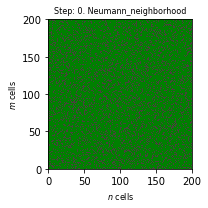

In [20]:
fig, ax = plt.subplots(figsize=(3,3))

ax.tick_params(left=True, labelleft=True, bottom=True, labelbottom=True)

fs = 8

def animate(i):
    ax.clear()
    frame = ax.pcolor(frames[i], cmap=cmap)
    ax.set_title(f"Step: {i}. Neumann_neighborhood", fontsize=fs)
    ax.set_xlabel(r'$n$ cells',  fontsize = fs)
    ax.set_ylabel(r'$m$ cells',  fontsize = fs)
    plt.tight_layout()
    return frame

#  Создаем объект анимации:
sin_animation = animation.FuncAnimation(fig, 
                                      animate, 
                                      frames=np.arange(0, 300),
                                      interval = 100,
                                      repeat = False)

#  Сохраняем анимацию в виде gif файла:
sin_animation.save('images/fire_forest_1.gif',
                writer='ffmpeg',  
                  dpi=300)